In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [77]:
data = pd.read_csv('processed_data.csv')

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Örneğin normalize etmek istediğin kolonlar:
cols_to_scale = ['tempo', 'loudness', 'duration_ms']
# Fit ve transform işlemi
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

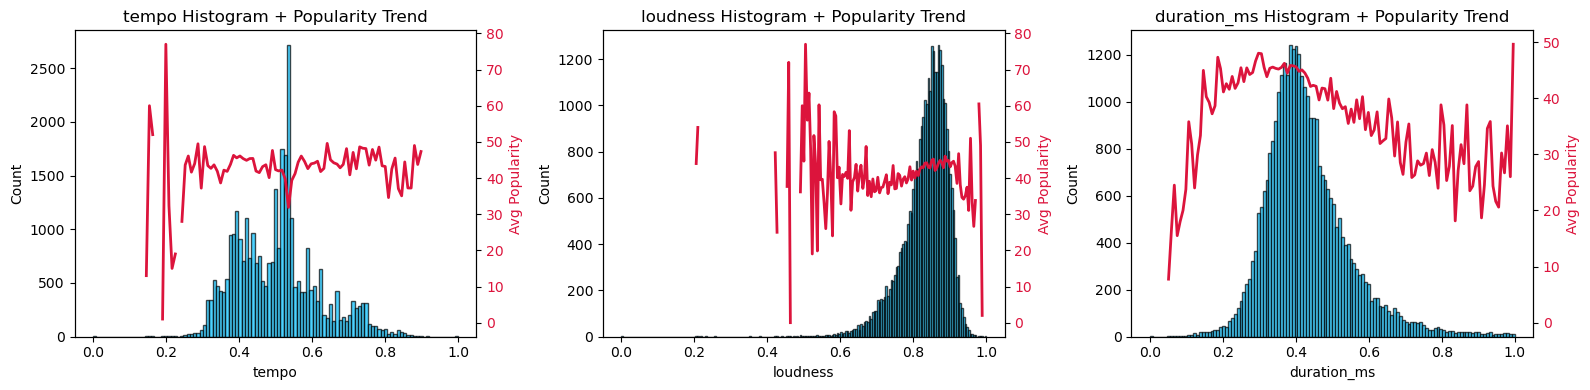

In [79]:
# Satır–sütun sayısını otomatik belirle
n_cols = 3
n_rows = math.ceil(len(cols_to_scale) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols_to_scale):
    # Histogram (önce otomatik bin aralıklarını al)
    counts, bins, patches = axes[i].hist(data[col], bins='auto', color='deepskyblue', edgecolor='black', alpha=0.7)
    
    # Popularity ortalamaları (bin aralıklarına göre)
    bin_labels = pd.cut(data[col], bins=bins, include_lowest=True)
    grouped = data.groupby(bin_labels)['popularity'].mean()
    centers = [interval.mid for interval in grouped.index]
    bin_means = grouped.values

    # Popularity çizgisi
    ax2 = axes[i].twinx()
    ax2.plot(centers, bin_means, color='crimson', linewidth=2)
    ax2.set_ylabel('Avg Popularity', color='crimson')
    ax2.tick_params(axis='y', labelcolor='crimson')

    axes[i].set_title(f'{col} Histogram + Popularity Trend')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Boş kalan hücreleri gizle
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [80]:
# Her sanatçının toplam şarkı sayısını hesapla
artist_song_counts = data['artist'].value_counts().to_dict()

# Yeni bir sütun ekle: her satıra o sanatçının toplam şarkı sayısını ata
data['artist_song_count'] = data['artist'].map(artist_song_counts)

In [81]:
# Her sanatçının ortalama popülerliğini hesapla
artist_avg_popularity = data.groupby('artist')['popularity'].mean().to_dict()

# Yeni bir sütun ekle: her satıra o sanatçının ortalama popülerliğini ata
data['artist_avg_popularity'] = data['artist'].map(artist_avg_popularity)

In [82]:
# 3. Her sanatçının yüksek popüler şarkı oranını hesapla
percentile_90 = data['popularity'].quantile(0.90)
artist_high_popularity_count = data[data['popularity'] > percentile_90].groupby('artist').size().to_dict()
# Geçici olarak count hesapla ama sütun oluşturma
artist_high_pop_count_temp = data['artist'].map(artist_high_popularity_count).fillna(0)
# Sadece ratio'yu sütun olarak ekle
data['artist_high_pop_ratio'] = artist_high_pop_count_temp / data['artist_song_count']

In [83]:
data.columns

Index(['track_id', 'name', 'artist', 'popularity', 'album_id', 'album_name',
       'album_release_date', 'playlist_name', 'playlist_id', 'genre',
       'subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'artist_song_count',
       'artist_avg_popularity', 'artist_high_pop_ratio'],
      dtype='object')

In [84]:
# One-hot encode
data = pd.get_dummies(data, columns=['key'], prefix='key', dtype=int)
data = pd.get_dummies(data, columns=['genre'], prefix='genre', dtype=int)
data = pd.get_dummies(data, columns=['subgenre'], prefix='subgenre', dtype=int)
# Yeni kolonları görelim
print(data.columns)

Index(['track_id', 'name', 'artist', 'popularity', 'album_id', 'album_name',
       'album_release_date', 'playlist_name', 'playlist_id', 'danceability',
       'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'artist_song_count', 'artist_avg_popularity', 'artist_high_pop_ratio',
       'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7',
       'key_8', 'key_9', 'key_10', 'key_11', 'genre_edm', 'genre_latin',
       'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock',
       'subgenre_album rock', 'subgenre_big room', 'subgenre_classic rock',
       'subgenre_dance pop', 'subgenre_electro house', 'subgenre_electropop',
       'subgenre_gangster rap', 'subgenre_hard rock', 'subgenre_hip hop',
       'subgenre_hip pop', 'subgenre_indie poptimism',
       'subgenre_latin hip hop', 'subgenre_latin pop', 'subgenre_neo soul',
       'subgenre_new jack swing', 'subgenre_permanent w

In [85]:
columns_to_drop = [ 'album_id', 
                   'album_name', 
                   'name', 
                   'album_release_date', 
                   'track_id',
                   'playlist_id', 
                   'playlist_name',
                   'artist',
]

data = data.drop(columns=columns_to_drop)
print(data.columns)

Index(['popularity', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'artist_song_count',
       'artist_avg_popularity', 'artist_high_pop_ratio', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'genre_edm', 'genre_latin', 'genre_pop',
       'genre_r&b', 'genre_rap', 'genre_rock', 'subgenre_album rock',
       'subgenre_big room', 'subgenre_classic rock', 'subgenre_dance pop',
       'subgenre_electro house', 'subgenre_electropop',
       'subgenre_gangster rap', 'subgenre_hard rock', 'subgenre_hip hop',
       'subgenre_hip pop', 'subgenre_indie poptimism',
       'subgenre_latin hip hop', 'subgenre_latin pop', 'subgenre_neo soul',
       'subgenre_new jack swing', 'subgenre_permanent wave',
       'subgenre_pop edm', 'subgenre_post-teen pop',
       'subgenre_progressive electro house', 'subgenre_reg

In [88]:
# Tüm numerik sütunların değer aralıklarını kontrol et
print("=" * 80)
print("TÜM SÜTUNLARIN DEĞER ARALIKLARI")
print("=" * 80)

# Numerik sütunları al
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Her sütun için min, max, range bilgisini göster
range_info = pd.DataFrame({
    'Column': numeric_cols,
    'Min': [data[col].min() for col in numeric_cols],
    'Max': [data[col].max() for col in numeric_cols],
    'Range': [data[col].max() - data[col].min() for col in numeric_cols],
    'Mean': [data[col].mean() for col in numeric_cols],
    'Std': [data[col].std() for col in numeric_cols]
})

# Range'e göre sırala (büyükten küçüğe)
range_info = range_info.sort_values('Range', ascending=False)

print("\n" + "=" * 80)
print("RANGE'E GÖRE SIRALANMIŞ SÜTUNLAR:")
print("=" * 80)
print(range_info.to_string(index=False))

# Normalize edilmesi gereken sütunları belirle (0-1 aralığında olmayanlar)
needs_normalization = range_info[(range_info['Min'] < 0) | (range_info['Max'] > 1)]

print("\n" + "=" * 80)
print("NORMALİZE EDİLMESİ GEREKEN SÜTUNLAR (0-1 dışında):")
print("=" * 80)
if len(needs_normalization) > 0:
    print(needs_normalization[['Column', 'Min', 'Max', 'Range']].to_string(index=False))
else:
    print("Tüm sütunlar 0-1 aralığında! ✓")

# One-hot encoded sütunları kontrol et
one_hot_cols = [col for col in data.columns if col.startswith(('key_', 'genre_', 'subgenre_'))]
print(f"\n" + "=" * 80)
print(f"ONE-HOT ENCODED SÜTUNLAR: {len(one_hot_cols)} adet")
print("=" * 80)
print("Örnek key sütunları:", [col for col in one_hot_cols if col.startswith('key_')][:5])
print("Örnek genre sütunları:", [col for col in one_hot_cols if col.startswith('genre_')][:5])
print("Örnek subgenre sütunları:", [col for col in one_hot_cols if col.startswith('subgenre_')][:5])

# 0-1 aralığında olan feature'ları göster
normalized_cols = range_info[(range_info['Min'] >= 0) & (range_info['Max'] <= 1)]
print("\n" + "=" * 80)
print(f"ZATEN 0-1 ARALIGINDA OLAN SÜTUNLAR: {len(normalized_cols)} adet")
print("=" * 80)
print(normalized_cols[['Column', 'Min', 'Max']].to_string(index=False))

TÜM SÜTUNLARIN DEĞER ARALIKLARI

RANGE'E GÖRE SIRALANMIŞ SÜTUNLAR:
                            Column      Min     Max      Range      Mean       Std
                 artist_song_count 1.000000 161.000 160.000000 16.320093 24.563676
                        popularity 0.000000 100.000 100.000000 42.477081 24.984074
             artist_avg_popularity 0.000000  97.000  97.000000 42.483551 18.567290
                              mode 0.000000   1.000   1.000000  0.565711  0.495671
                          loudness 0.000000   1.000   1.000000  0.832481  0.062620
                             tempo 0.000000   1.000   1.000000  0.504849  0.112361
             artist_high_pop_ratio 0.000000   1.000   1.000000  0.090380  0.186899
                             key_1 0.000000   1.000   1.000000  0.122133  0.327445
                             key_0 0.000000   1.000   1.000000  0.105199  0.306814
                             key_6 0.000000   1.000   1.000000  0.081321  0.273331
                    